In [3]:
# The code is from lower part of 'https://pennylane.ai/qml/demos/tutorial_qaoa_intro.html'
# To run the code in local laptop one needs to install pennylane using code <!pip install pennylane> in this notebook
# 

In [4]:
import pennylane as qml

In [5]:
dev = qml.device('default.qubit', wires=2)

In [6]:
# QAOA Code
from pennylane import qaoa
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

In [7]:
# code to read data from external sources. The file 'data.txt' has the data that needs to be fed to quantum computer.
# This is not running.
# Row 7 and 9 are errorneous.
###################################################################################################################
# edges = open('data.txt', "r")
# print(edges.read())
# with open("data.txt", "r") as data_edges:
#     edges = data_edges.read()
    
# elems = ([f.strip(" {}'") for f in edges.strip().split(',')])

# edges_list = zip(elems[::2], elems[1::2])

# edges = [(0, 1), (1, 2), (2, 0), (2, 3)]
# # graph_list = nx.Graph(edges_list)
# graph = nx.Graph(edges)
# print(edges)
# # print(edges_list)

# nx.draw(graph, with_labels=True)
# # nx.draw(graph_list, with_labels=True)
# plt.show()

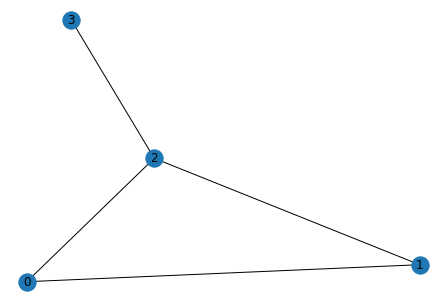

In [8]:
edges = [(0, 1), (1, 2), (2, 0), (2, 3)]
# # graph_list = nx.Graph(edges_list)
graph = nx.Graph(edges)

nx.draw(graph, with_labels=True)
plt.show()

In [9]:
# with open("data1.txt", encoding='utf-8') as data_edges:
#     edges = data_edges.read()

# print(edges)
# elems = ([f.strip(" {}'") for f in edges.strip().split(',')])

# print(elems)
# edges_list = zip(elems[::2], elems[1::2])

# print(edges_list)
# graph_list = nx.Graph(edges_list)

# nx.draw(graph_list, with_labels=True)
# plt.show()

In [10]:
# cost_h, mixer_h = qaoa.min_vertex_cover(graph, constrained=False)

cost_h, mixer_h = qaoa.min_vertex_cover(graph, constrained=False)
print("Cost hamiltonian: ", cost_h)
print("Mixer Hamiltonian: ", mixer_h)

Cost hamiltonian:  (0.75) [Z0 Z1]
+ (0.5) [Z0]
+ (0.5) [Z1]
+ (0.75) [Z0 Z2]
+ (1.25) [Z2]
+ (0.75) [Z1 Z2]
+ (0.75) [Z2 Z3]
+ (-0.25) [Z3]
Mixer Hamiltonian:  (1) [X0]
+ (1) [X1]
+ (1) [X2]
+ (1) [X3]


In [11]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [12]:
wires = range(4)
depth = 2

def circuit(params, **kwargs):
    for w in wires:
        qml.Hadamard(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])

In [13]:
dev = qml.device("qulacs.simulator", wires=wires)
cost_function = qml.ExpvalCost(circuit, cost_h, dev)

In [14]:
optimizer = qml.GradientDescentOptimizer()
steps = 20
params = [[0.5, 0.5], [0.5, 0.5]]

In [15]:
for i in range(steps):
    params = optimizer.step(cost_function, params)
    
print("Optimal Parameters")
print(params)

Optimal Parameters
[[0.6252800322400491, 0.9113192880743045], [0.5180154423607389, 0.824691517132233]]


In [16]:
@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)

probs = probability_circuit(params[0], params[1])

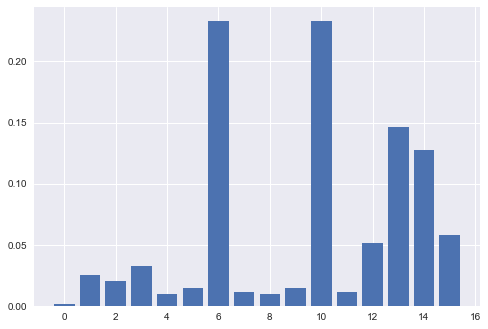

In [17]:
plt.style.use("seaborn")
plt.bar(range(2**len(wires)), probs)
plt.show()